In [59]:
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
from IPython.core.display import display

In [67]:
fsort = pd.read_csv('funnelsort_results.csv', header=None)
stdsort = pd.read_csv('stdsort_results.csv', header=None)
cols = ['Arrsize', 'Dataref', 'L1miss', "LLmiss", "Time"]
stdsort.columns = cols
fsort.columns = cols

In [68]:
display(fsort)
display(stdsort)

,Arrsize,Dataref,L1miss,LLmiss,Time
0,100,888293,16469,9405,0.060042
1,200,1041033,16627,9507,0.057195
2,400,1524088,17106,9887,0.066246
3,1000,2808812,18078,10753,0.082067
4,2000,4790602,19558,11920,0.111457
5,4000,8392865,21948,13717,0.152910
6,8000,19936524,31903,21310,0.307218
7,20000,50835919,54309,38700,0.756640
8,1000000,3080624014,2218272,1705101,38.526000
9,2000000,6531878028,4572287,3693049,82.188200


,Arrsize,Dataref,L1miss,LLmiss,Time
0,100,803711,16232,9263,0.018529
1,200,874235,16252,9275,0.019204
2,400,1027988,16291,9300,0.020004
3,1000,1550262,16423,9376,0.023485
4,2000,2472469,16662,9501,0.029755
5,4000,4466245,17258,9751,0.044859
6,8000,8674009,18899,10251,0.077826
7,20000,22395880,24221,11750,0.175824
8,1000000,1458127042,858643,195232,13.925600
9,2000000,3018590454,1804324,716370,24.165300


stdsort


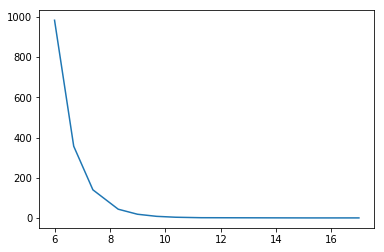

[ 982.323  356.809  140.323   44.046   19.136    8.666    4.216    1.883
    0.862    0.853    0.877    0.908]
[ 560.575  203.63    80.106   25.146   10.912    4.896    2.287    0.914
    0.196    0.338    0.4      0.429]

funnelsort


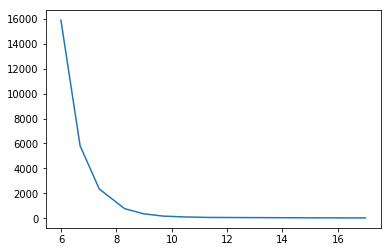

[ 8935.887  3272.886  1321.046   434.701   201.388    98.813    63.806
    37.864    19.974    19.369    16.963    16.516]
[ 9067.749  3325.3    1356.764   459.453   218.1     109.736    75.733
    47.945    27.282    27.799    23.764    22.572]


In [72]:
N = fsort['Arrsize'].values * 4 #because 4 bytes to an int
B = 64
plot_col = 'L1miss' #3 is LL, 2 is L1

def M(col):
    if col == 2:
       return 32000
    if col == 3:
       return 4*int(1e6)

std_sort = N/B * np.log2(N/B)
sort_bound_L1 = N/B * np.log(N/B) / np.log(M(2)/B)
sort_bound_LL = N/B * np.log(N/B) / np.log(M(3)/B)
print("stdsort")
plt.plot(np.log(N), stdsort[plot_col].values/std_sort)
plt.show()
print(stdsort['L1miss'].values/std_sort)
print(stdsort['LLmiss'].values/std_sort)
print()
print("funnelsort")
plt.plot(np.log(N), fsort[plot_col].values/sort_bound)
plt.show()
print(fsort['L1miss'].values/sort_bound_L1)
print(fsort['LLmiss'].values/sort_bound_LL)